# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

# **Get the Data**

In [ ]:
data =  pd.read_csv("/content/insurance.csv")

# **Let's look At The Data**

In [ ]:
# print first 5 rows
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**As we see we have 3 categorical features and 4 numeric features**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**first of all the mean for the feature is far a way from each other**

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.corr()["charges"]

<ipython-input-100-b57576c4472a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["charges"]


age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

<ipython-input-101-0db6b452fb05>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() , annot = True)


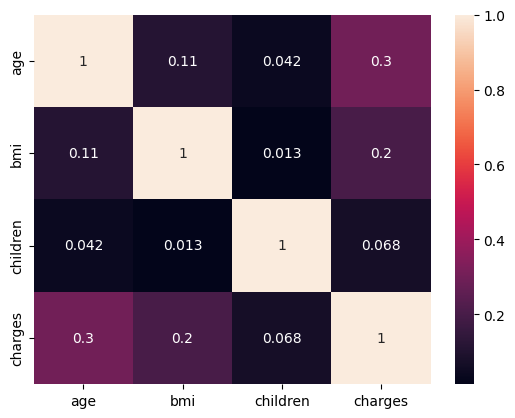

In [ ]:
sns.heatmap(data.corr() , annot = True)
plt.show()

# **NAN Value**

**As we see there is no nan value , thanks for the auther😂❤**

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

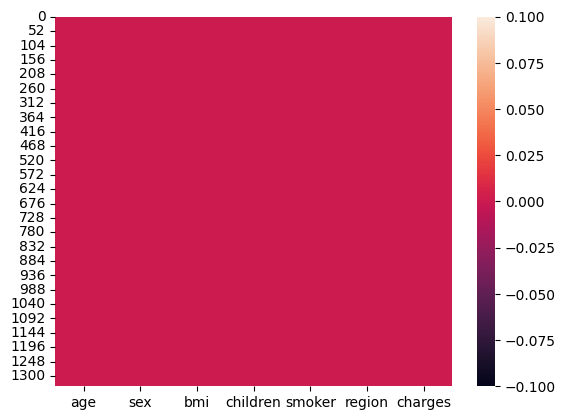

In [ ]:
sns.heatmap(data.isna())

# **Duplicates**

In [ ]:
print("Number of duplicate recored  Before drop it is : " , data.duplicated().sum())

Number of duplicate recored  Before drop it is :  1


**We have just one recored repeated , it will not effect on the data but we will remove it👍😒**

In [ ]:
data.drop_duplicates(inplace = True)

In [ ]:
print("Number of duplicate recored  After drop it is : " , data.duplicated().sum())

Number of duplicate recored  After drop it is :  0


# **EDA**

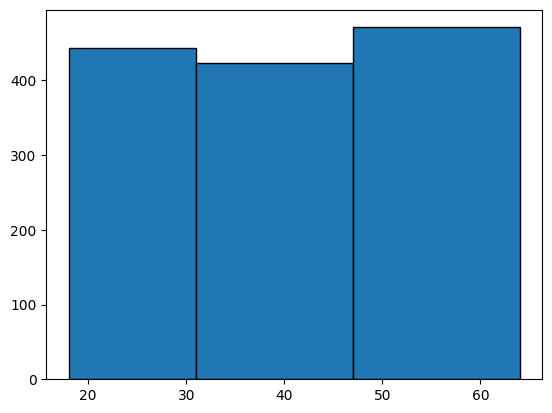

In [ ]:
#define function to calculate equal-frequency bins
def equalObs(x, nbin):
    nlen = len(x)
    return np.interp(np.linspace(0, nlen, nbin + 1),
                     np.arange(nlen),
                     np.sort(x))

#create histogram with equal-frequency bins
n, bins, patches = plt.hist(data['age'], equalObs(data['age'], 3), edgecolor='black')
plt.show()

In [ ]:
bins

array([18., 31., 47., 64.])

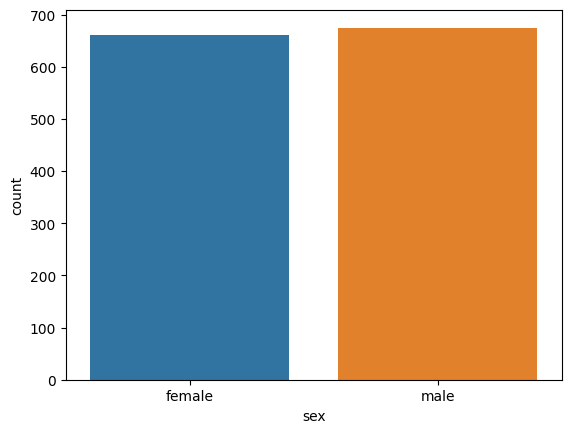

In [ ]:
sns.countplot(data= data , x = "sex")
plt.show()

In [ ]:
data["sex"].value_counts()

male      675
female    662
Name: sex, dtype: int64

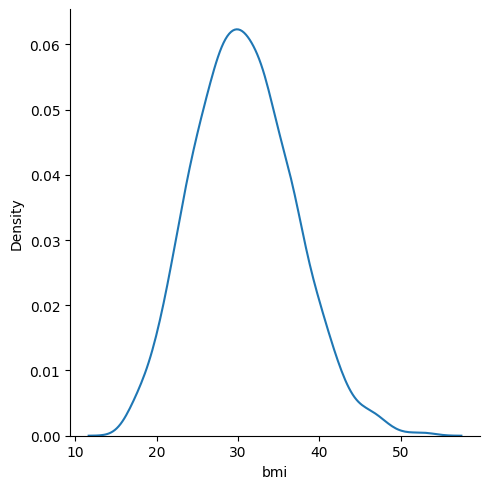

In [ ]:
sns.displot(data = data , x = "bmi" ,  kind = "kde")

<Axes: xlabel='smoker', ylabel='count'>

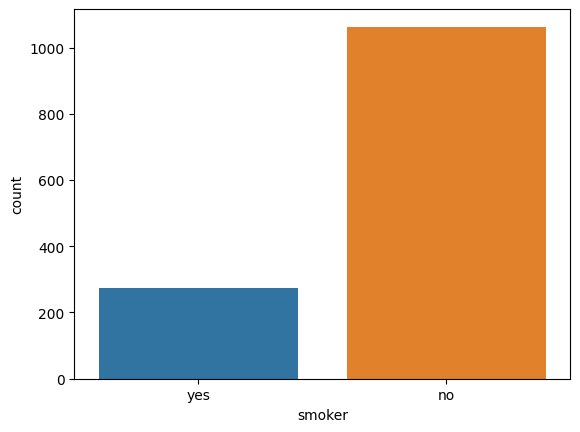

In [ ]:
sns.countplot(data = data , x ="smoker")

<Axes: xlabel='region', ylabel='count'>

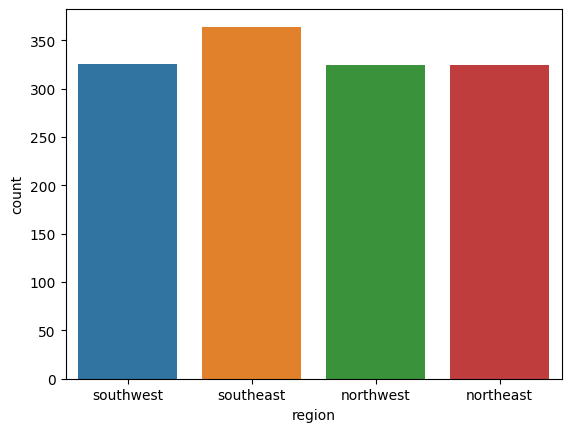

In [ ]:
sns.countplot(data = data , x="region")

# **Outliers**

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

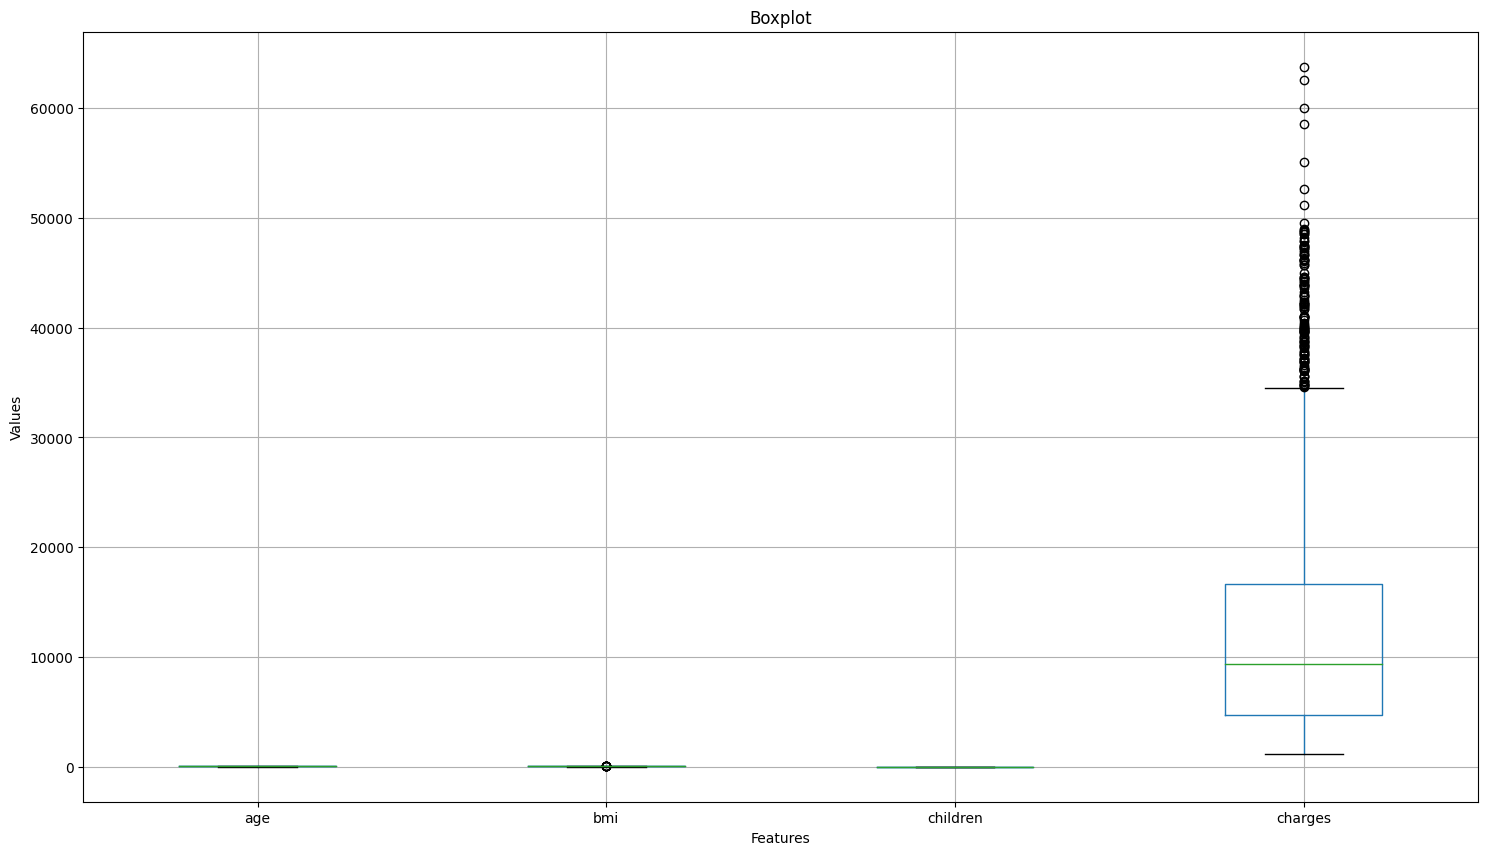

In [ ]:
attr =['age', 'bmi', 'children',  'charges']
plt.figure(figsize=(18, 10))
data[attr].boxplot()


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot')


plt.show()

In [ ]:
Q1 = data["charges"].quantile(0.25)
Q3 = data["charges"].quantile(0.75)

IQR = Q3-Q1

Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR

ls = data.index[(data["charges"]<Lower_bound ) | (data["charges"]>Upper_bound) ]


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# **Imbalance**

**for solve the inbalace feature we delet the out liers and we will normalize the data**

<Axes: xlabel='charges', ylabel='Count'>

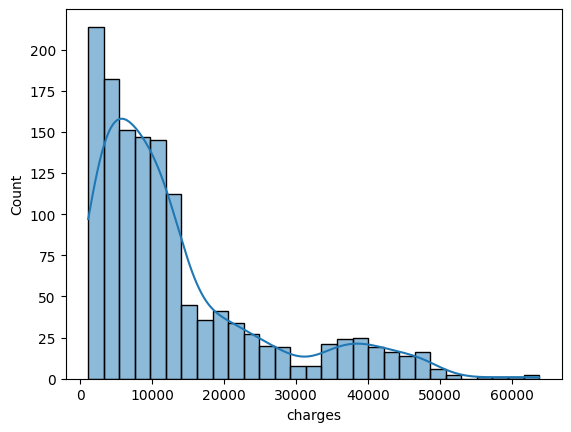

In [ ]:
sns.histplot(data = data  , x = "charges" , kde = True)

# **Feature Engineering**

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.loc[data["age"].between(18, 30, inclusive = True)  ,'Age' ] ='Adult'
data.loc[data["age"].between(31, 46, inclusive = True)  ,'Age' ] ='Middle Age Adult'
data.loc[data["age"].between(47, 65, inclusive = True)  ,'Age' ] ='Senior Adult'

<ipython-input-120-4a334fbee655>:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[data["age"].between(18, 30, inclusive = True)  ,'Age' ] ='Adult'
<ipython-input-120-4a334fbee655>:2: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[data["age"].between(31, 46, inclusive = True)  ,'Age' ] ='Middle Age Adult'
<ipython-input-120-4a334fbee655>:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  data.loc[data["age"].between(47, 65, inclusive = True)  ,'Age' ] ='Senior Adult'


In [ ]:
data["Age"].value_counts()

Senior Adult        471
Adult               443
Middle Age Adult    423
Name: Age, dtype: int64

In [ ]:
data = data.drop(columns= "age" , axis = 1)

In [ ]:
categ = [ 'sex', 'smoker', 'region' , 'Age']

# Encode Categorical Columns
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

In [ ]:
data["Age"].value_counts()

2    471
0    443
1    423
Name: Age, dtype: int64

In [ ]:
data["region"].value_counts()

2    364
3    325
1    324
0    324
Name: region, dtype: int64

In [ ]:
data["smoker"].value_counts()

0    1063
1     274
Name: smoker, dtype: int64

In [ ]:
data["sex"].value_counts()

1    675
0    662
Name: sex, dtype: int64

# **Split The Data**

In [ ]:
X = data.drop(columns = "charges" , axis = 1)
y= data["charges"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=42)

In [ ]:
X_train.shape

(1069, 6)

In [ ]:
X_test.shape

(268, 6)

# **Normalization**

In [ ]:
data.mean(axis =  0)

sex             0.504862
bmi            30.663452
children        1.095737
smoker          0.204936
region          1.516081
charges     13279.121487
Age             1.020942
dtype: float64

In [ ]:

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
X_train_scaled = scaler.fit_transform(X_train)


# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# Modeling & Evaluation

**Evaluation**

In [ ]:
def evaluate(model):
    print(f'accuracy on train: {model.score(X_train, y_train)}')
    print(f'accuracy on test: {model.score(X_test, y_test)}')

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'\n\n{cm}')
    print(f'\n\n{classification_report(y_test, y_pred)}')

    scores = cross_val_score(model, X, y, scoring="recall", cv=10)
    print(f'10-Fold cross validation avg score: {scores.mean()}')
    print("---------------------------------------------------------")

**Linear Regression**

In [ ]:
# Step 4: Build and train the linear regression model
linear = LinearRegression()  # Create a Linear Regression object
linear.fit(X_train, y_train)  # Train the model using the training data

# Step 5: Evaluate the model
y_pred = linear.predict(X_test)  # Predict the target variable for the test data

mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
r2 = r2_score(y_test, y_pred)  # Calculate coefficient of determination (R-squared)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 37375155.43752451
R-squared: 0.7966045059108086


In [ ]:
y_train_pred = linear.predict(X_train)  # Predict the target variable for the test data

r2_train = r2_score(y_train, y_train_pred)  # Calculate coefficient of determination (R-squared)

print("R-squared:", r2_train)

R-squared: 0.7155798341808045
